<center><img src="/content/global-electric-vehicle-ev-charging-station-market-is-expected-to-grow-at-cagr-29-by-2027-owing-to-growing-adoption-of-electric-vehicles-across-various-regions-says-absolute-markets-insights.jpeg" width="525" height="525" /></center>

Table Contents



1.   Data **Exploration**
2.   EDA

3.   Most popular countries to sell electrict vehicles
4.   Most Popular Categories

5.   Mean values among Categories
6.   Encoding Values

7.   Scaling Values

8.   Defining Values
9.   Results

The Global EV Outlook is an annual publication that identifies and discusses recent developments in electric mobility across the globe. It is developed with the support of the members of the Electric Vehicles Initiative (EVI).

Combining historical analysis with projections to 2030, the report examines key areas of interest such as electric vehicle and charging infrastructure deployment, energy use, CO2 emissions, battery demand, and related policy developments. The report includes policy recommendations that incorporate lessons learned from leading markets to inform policymakers and stakeholders concerning policy frameworks and market systems for electric vehicle adoption ***bold text***

In [ ]:
!pip install Pillow

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
from PIL import Image

In [ ]:
image_path = 'global-electric-vehicle-ev-1.jpeg'

In [ ]:
image = Image.open('/content/global-electric-vehicle-ev-charging-station-market-is-expected-to-grow-at-cagr-29-by-2027-owing-to-growing-adoption-of-electric-vehicles-across-various-regions-says-absolute-markets-insights.jpeg')

In [ ]:
resized_image = image.resize((525, 425))

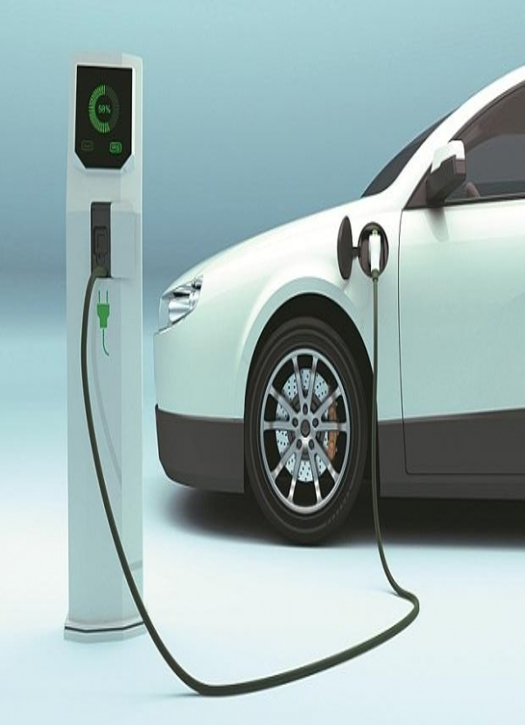

In [ ]:
display(resized_image)

***Import Libraries***

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Global EV 2023.csv')

In [ ]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [ ]:
df.shape

(9542, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   int64  
 1   category    9542 non-null   int64  
 2   parameter   9542 non-null   int64  
 3   mode        9542 non-null   int64  
 4   powertrain  9542 non-null   int64  
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   int64  
 7   value       9542 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 596.5 KB


***Exploratory Data Analysis***

***Most popular countries to sell electrict vehicles***

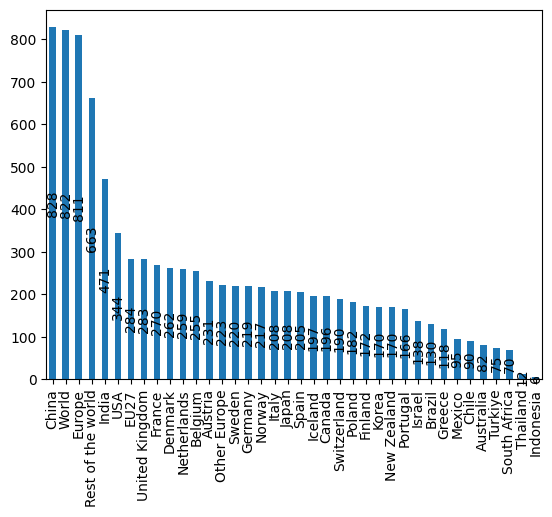

In [ ]:
counts = df["region"].value_counts()
fig, axes = plt.subplots()
counts.plot(kind="bar", ax=axes)
for container in axes.containers:
    axes.bar_label(container, rotation=90, label_type="center")
plt.show()

***Most popular categories***

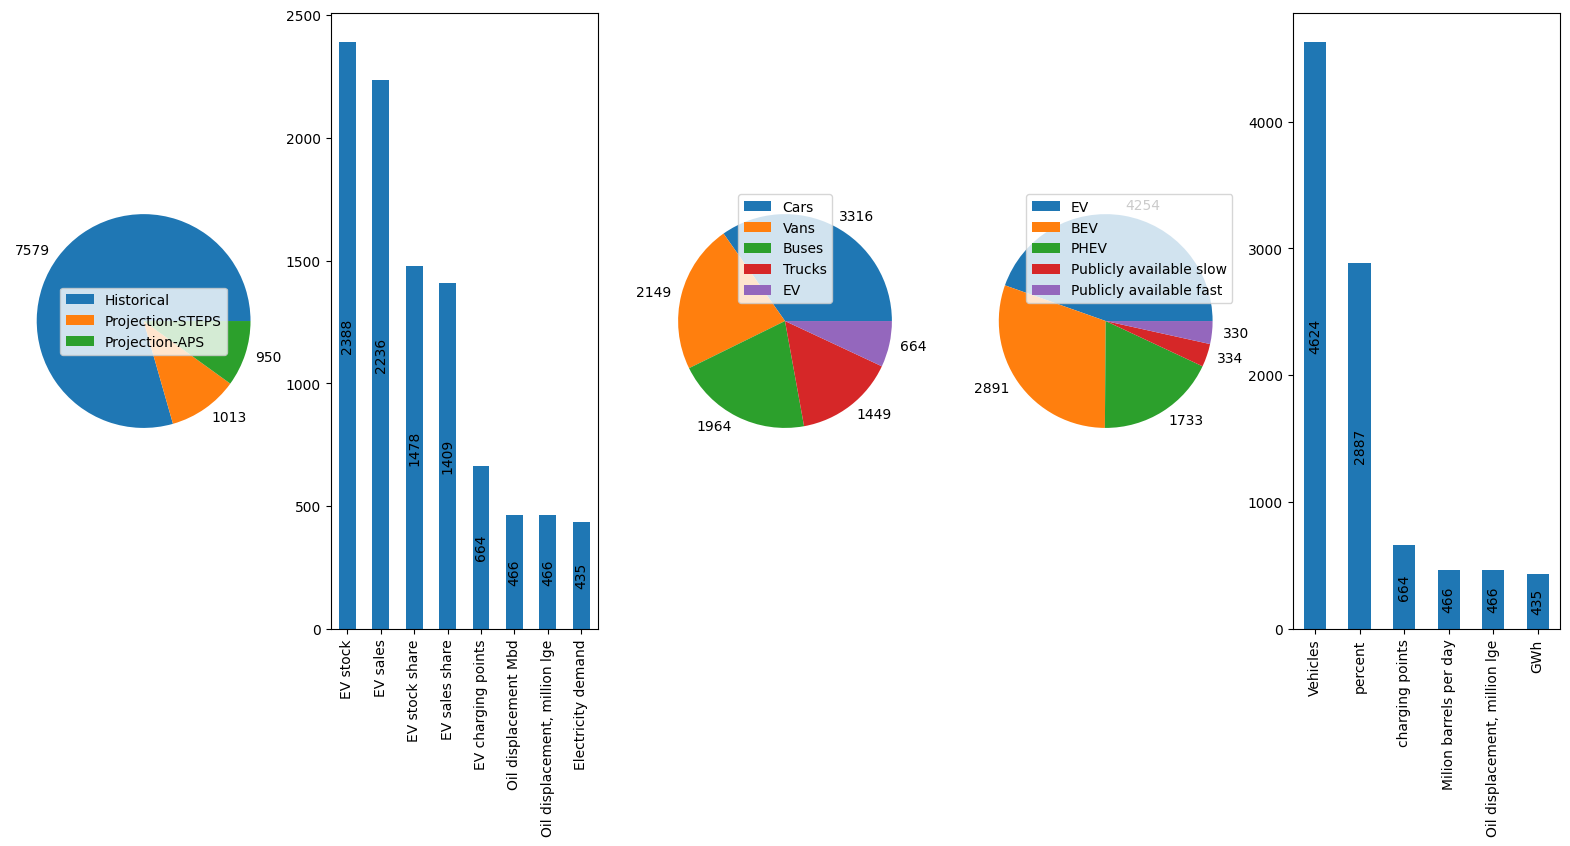

In [ ]:
categoricals = ["category", "parameter", "mode", "powertrain", "unit"]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
for i in range(5):
    counts = df[categoricals[i]].value_counts()
    if len(counts)>5:
        counts.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, rotation=90, label_type="center")
    else:
        axes[i].pie(counts, labels=counts)
        axes[i].legend(counts.index)
plt.show()

In [ ]:
def plot(df, name):
    group = df.groupby(name)
    fig, axes = plt.subplots(figsize=(20, 5))
    means = group["value"].mean()
    sns.barplot(x=means.index, y=means, ax=axes)
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    plt.show()

***Mean values among categories***

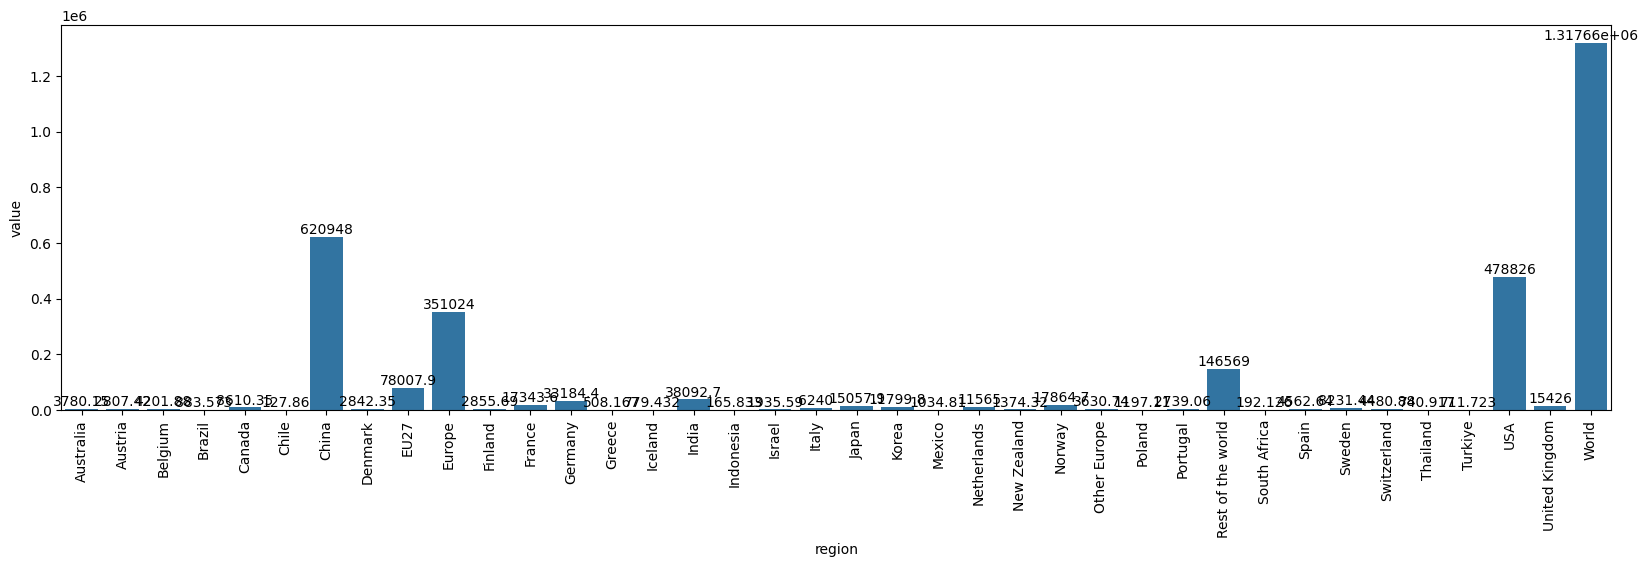

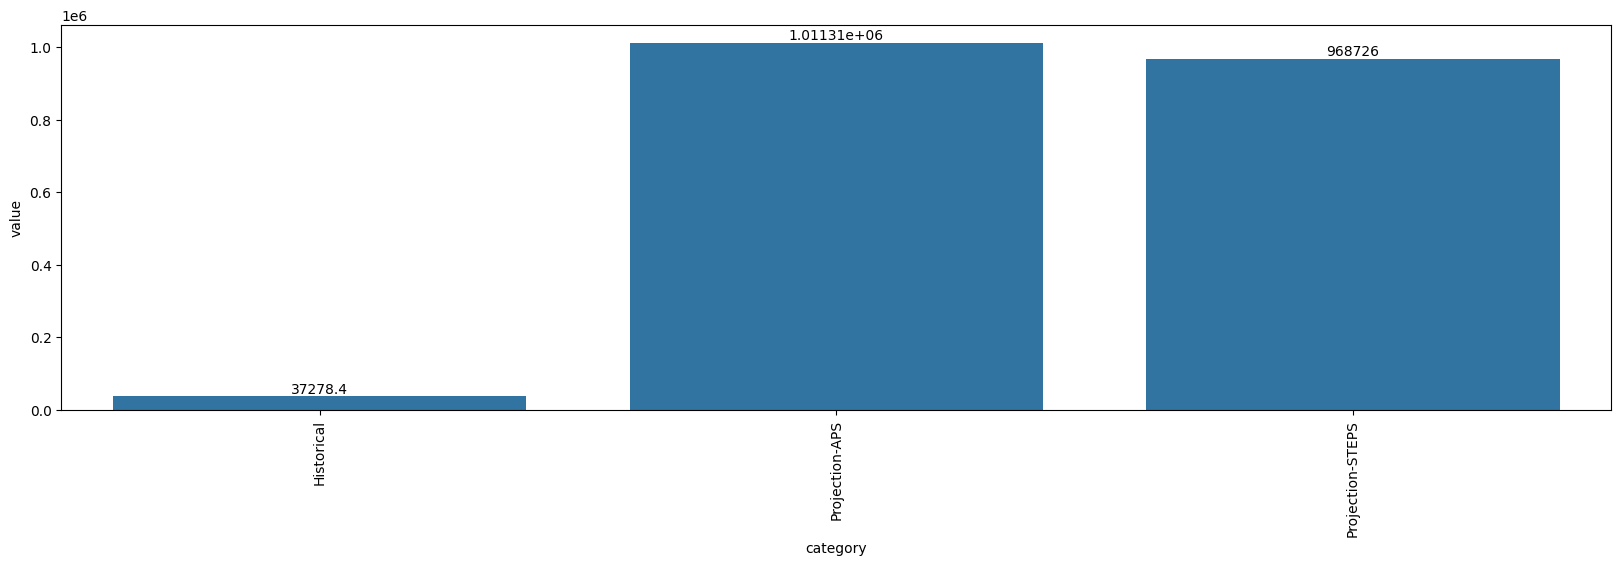

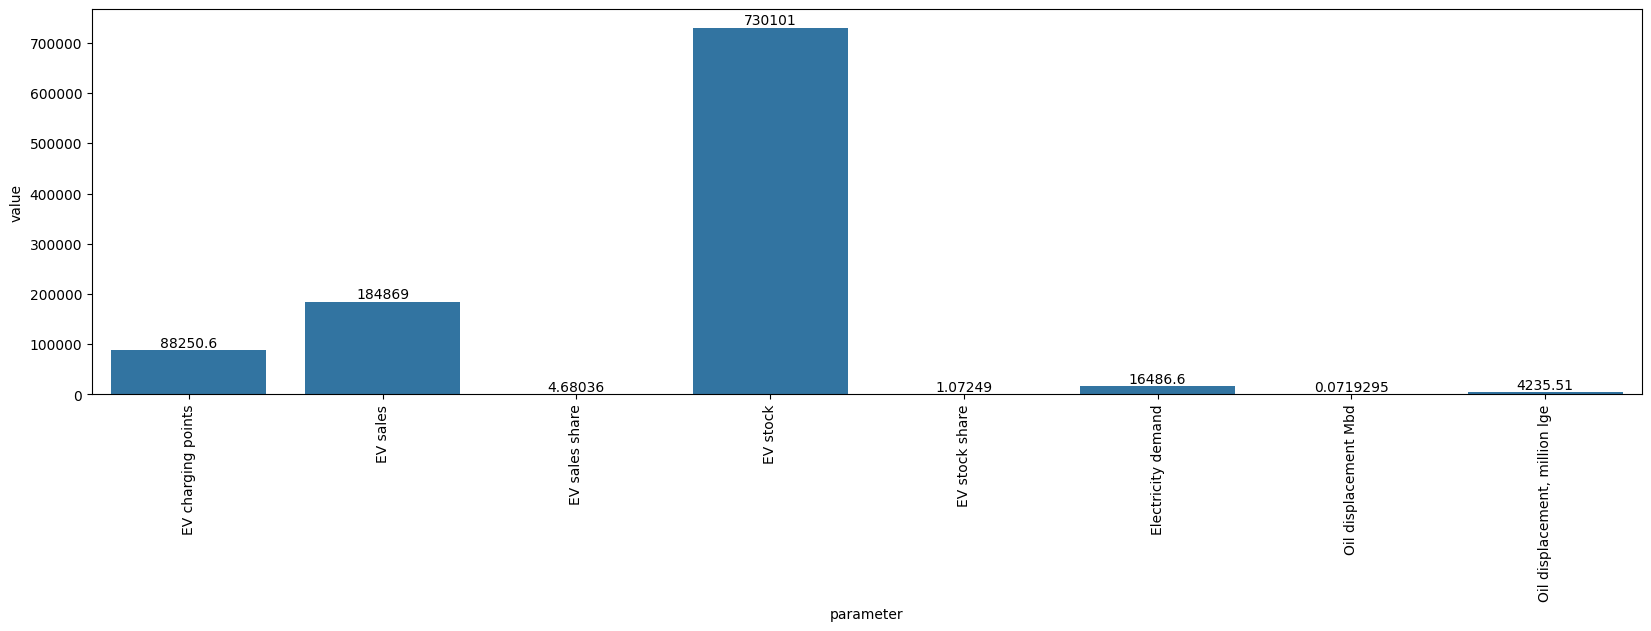

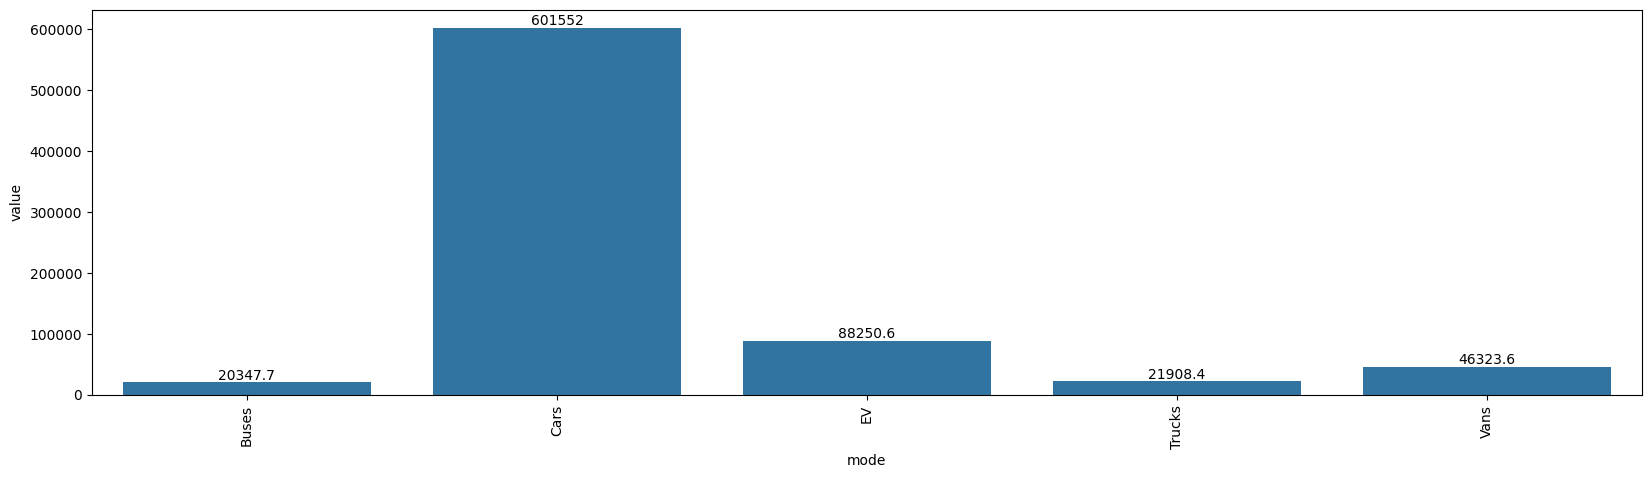

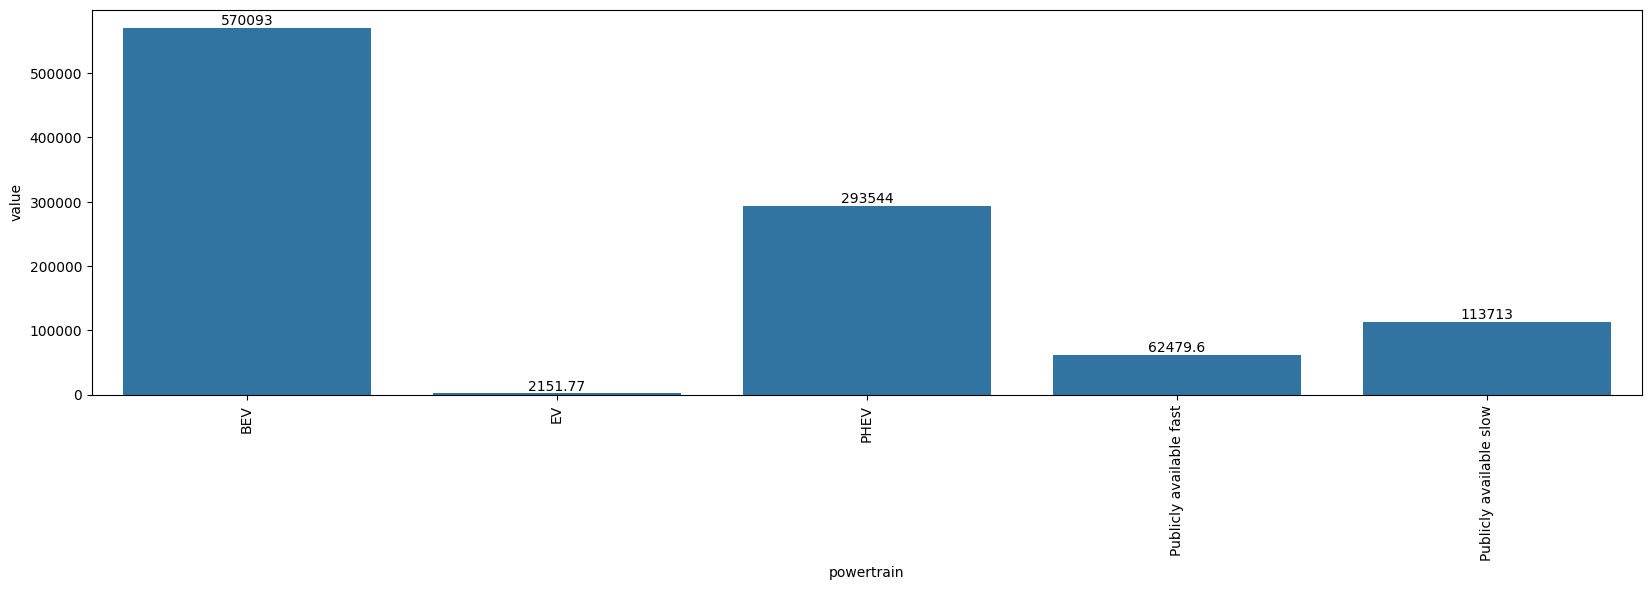

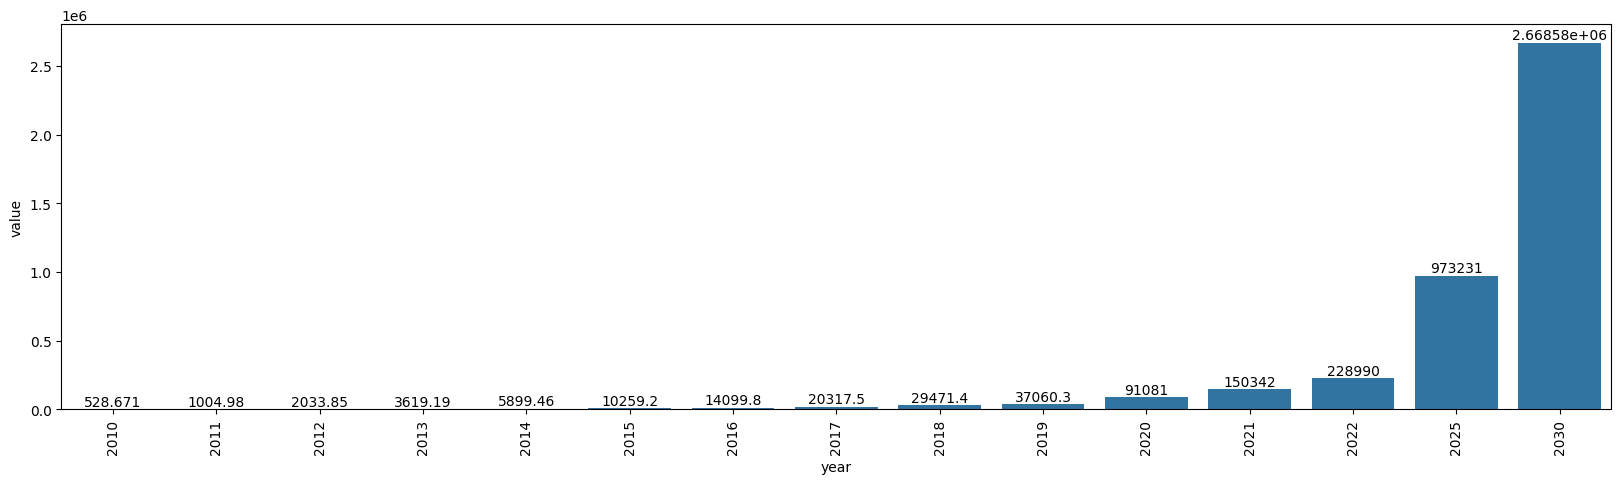

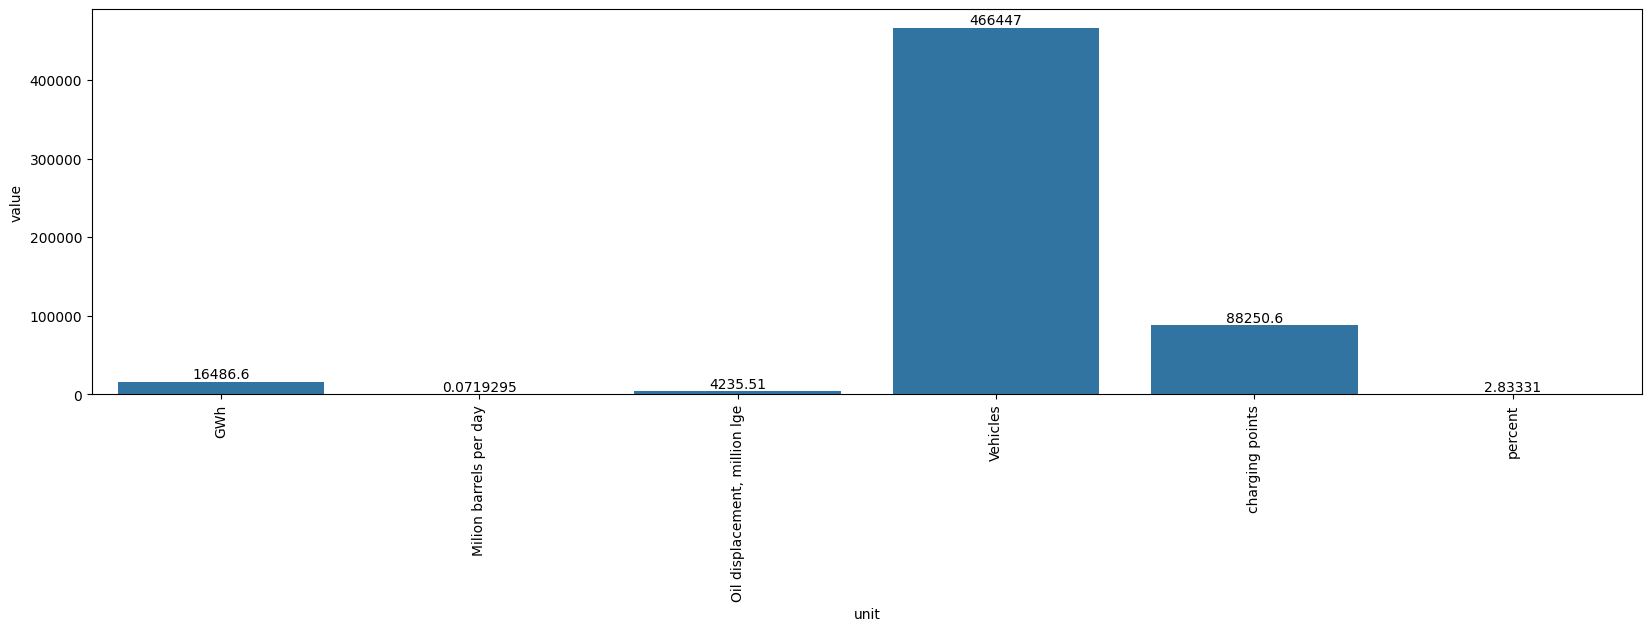

In [ ]:
for i in df.columns[:-1]:
    plot(df, i)

***Encoding Values***

In [ ]:
le = LabelEncoder()

for i in df.columns[:-1]:
    if i != "year":
        df[i] = le.fit_transform(df[i])

***Scaling values***

In [ ]:
data = df.values
scaler = MinMaxScaler()

data = scaler.fit_transform(data)

x = data[:, :-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [ ]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print("MSE: ", mse)
    print("R2: ", r2)

***Defining Models***

In [ ]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor(learning_rate=0.9)
svr = SVR(C=0.9)
lnr = LinearRegression()
xgb = XGBRegressor(learning_rate=0.9)

models = [rfr, abr, svr, lnr, xgb]
names = ["Random Forest", "Ada Boost", "Support Vectors", "Linear Regression", "XGB"]

***Results***

In [ ]:
for i, j in zip(models, names):
    print("*"*50)
    print(j)
    training(i)
    print()

**************************************************
Random Forest
MSE:  0.00011731364095719836
R2:  0.7400113104605797

**************************************************
Ada Boost
MSE:  0.00017186843427768078
R2:  0.6191078152851037

**************************************************
Support Vectors
MSE:  0.0014167717549205113
R2:  -2.139827806321673

**************************************************
Linear Regression
MSE:  0.00044308007907332535
R2:  0.018052733003781407

**************************************************
XGB
MSE:  4.660959610807225e-05
R2:  0.8967045288746891

